## ScotiaBank

### Predict the price of gold at market close on Friday July 24, 2020.

### Data & Features

We collected data on daily gold prices from 1978 -2020. However, for the sake of this challenge, we decided to work with data from a shorter timeframe, from 03.07.2007 to 10.07.2020. 

### Table of Contents

1. Merge data from various sources
2. Initial data analysis and visualization
3. Calculating Technical Indicators
4. Building regression models :
    
    a)Decision Tree Regressor
    b)Support vector Regressor
    c)Lasso 
    d)Ridge 
    e)Bayesian ridge Regressor
    f)Random Forest Regressoor
    g)Gradient Boosting Regressor
    
5. Conclusion regarding trying a different Approach in Notebook 2    
    

#### Importing Libraries and merging data

In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

#datetime import
from datetime import datetime

#scikitlearn libraries
from sklearn import linear_model, svm, feature_selection, model_selection
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, RFECV

In [2]:
#get the gold data
date_format = '%Y-%m-%d'
gold_price = pd.read_csv('gold_price.csv')
gold_price['Date'] = [datetime.strptime(i, date_format) for i in gold_price['Date']]

gold_price.head()

,Date,Gold_Price
0,2007-07-03,654.3
1,2007-07-04,654.2
2,2007-07-05,651.0
3,2007-07-06,648.8
4,2007-07-09,661.3


In [5]:
date_format = '%Y-%m-%d'
eur_usd =  pd.read_csv('EUR_USD_Exchange_Rate.csv', 
                       usecols= ['Date','EU_Open', 'EU_High', 'EU_Low', 'EU_Close', 'EU_Adj_Close'])
eur_usd['Date'] = [datetime.strptime(i, date_format) for i in eur_usd['Date']]

eur_usd.head(2)

,Date,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897


In [6]:
date_format = '%Y-%m-%d'
gold_etf =  pd.read_csv('Gold ETF.csv', 
                       usecols= ['Date','G_ETF_Open', 'G_ETF_High', 'G_ETF_Low', 'G_ETF_Close', 'G_ETF_Adj_Close'])
gold_etf['Date'] = [datetime.strptime(i, date_format) for i in gold_etf['Date']]

gold_etf.head(2)

,Date,G_ETF_Open,G_ETF_High,G_ETF_Low,G_ETF_Close,G_ETF_Adj_Close
0,2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001
1,2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999


In [7]:
date_format = '%Y-%m-%d'
palladium =  pd.read_csv('palladium.csv', 
                       usecols= ['Date','PLD'])
palladium['Date'] = [datetime.strptime(i, date_format) for i in palladium['Date']]

palladium.head(2)

,Date,PLD
0,2007-07-03,369.0
1,2007-07-04,370.0


In [8]:
date_format = '%Y-%m-%d'
platinum =  pd.read_csv('Platinum_price.csv', 
                       usecols= ['Date','PLT'])
platinum['Date'] = [datetime.strptime(i, date_format) for i in platinum['Date']]

platinum.head(2)

,Date,PLT
0,2007-07-03,1294.2
1,2007-07-04,1298.0


In [9]:
date_format = '%Y-%m-%d'
sp =  pd.read_csv('S&P Index.csv', 
                       usecols= ['Date','SP_Open', 'SP_High', 'SP_Low', 'SP_Close', 'SP_Adj_Close'])
sp['Date'] = [datetime.strptime(i, date_format) for i in sp['Date']]

sp.head(2)

,Date,SP_Open,SP_High,SP_Low,SP_Close,SP_Adj_Close
0,1979-01-02,96.110001,96.959999,95.220001,96.730003,96.730003
1,1979-01-03,96.809998,98.540001,96.809998,97.800003,97.800003


In [10]:
date_format = '%Y-%m-%d'
silver =  pd.read_csv('silver futures.csv', 
                       usecols= ['Date','SF_Price'])
silver['Date'] = [datetime.strptime(i, date_format) for i in silver['Date']]

silver.head(2)

,Date,SF_Price
0,2007-07-03,12.685
1,2007-07-04,12.750


In [11]:
date_format = '%Y-%m-%d'
us_bond =  pd.read_csv('us_bond.csv', 
                       usecols= ['Date','USB_Price'])
us_bond['Date'] = [datetime.strptime(i, date_format) for i in us_bond['Date']]

us_bond.head(2)

,Date,USB_Price
0,2007-07-03,5.05
1,2007-07-05,5.16


In [12]:
date_format = '%Y-%m-%d'
us_oil =  pd.read_csv('United States Oil Fund USO.csv', 
                       usecols= ['Date','USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj_Close'])
us_oil['Date'] = [datetime.strptime(i, date_format) for i in us_oil['Date']]

us_oil.head(2)

,Date,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj_Close
0,2006-04-10,546.000000,548.000000,541.359985,544.159973,544.159973
1,2006-04-11,546.559998,547.119995,538.400024,545.599976,545.599976


In [13]:
m1 = pd.merge(gold_price, eur_usd, on = 'Date')
m1.head()

,Date,Gold_Price,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close
0,2007-07-03,654.3,1.363196,1.363401,1.358991,1.361192,1.361192
1,2007-07-04,654.2,1.361192,1.363104,1.360803,1.361507,1.361507
2,2007-07-05,651.0,1.361600,1.365505,1.358400,1.359897,1.359897
3,2007-07-06,648.8,1.359804,1.363996,1.357405,1.362992,1.362992
4,2007-07-09,661.3,1.362806,1.363903,1.361304,1.362398,1.362398


In [14]:
m2 = pd.merge(m1, gold_etf, on = 'Date')
m3 = pd.merge(m2, palladium, on = 'Date')
m4 = pd.merge(m3, platinum, on = 'Date')
m5 = pd.merge(m4, sp, on = 'Date')
m6 = pd.merge(m5, silver, on = 'Date')
m7 = pd.merge(m6, us_bond, on = 'Date')

#final merge
data = pd.merge(m7, us_oil, on = 'Date')

In [15]:
data.head()

,Date,Gold_Price,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close,G_ETF_Open,G_ETF_High,G_ETF_Low,...,SP_Low,SP_Close,SP_Adj_Close,SF_Price,USB_Price,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj_Close
0,2007-07-03,654.3,1.363196,1.363401,1.358991,1.361192,1.361192,65.059998,65.059998,64.580002,...,1519.119995,1524.869995,1524.869995,12.685,5.05,426.320007,428.320007,425.600006,428.320007,428.320007
1,2007-07-05,651.0,1.361600,1.365505,1.358400,1.359897,1.359897,64.989998,65.000000,63.919998,...,1517.719971,1525.400024,1525.400024,12.580,5.16,433.600006,435.440002,426.480011,433.200012,433.200012
2,2007-07-06,648.8,1.359804,1.363996,1.357405,1.362992,1.362992,64.180000,64.970001,63.880001,...,1520.469971,1530.439941,1530.439941,12.760,5.19,437.279999,439.200012,434.799988,437.440002,437.440002
3,2007-07-09,661.3,1.362806,1.363903,1.361304,1.362398,1.362398,65.000000,65.680000,64.989998,...,1527.449951,1531.849976,1531.849976,12.820,5.16,438.000000,440.079987,433.760010,434.799988,434.799988
4,2007-07-10,661.7,1.362398,1.377999,1.360193,1.376008,1.376008,65.699997,65.860001,65.360001,...,1510.010010,1510.119995,1510.119995,12.975,5.03,434.399994,440.000000,433.440002,437.760010,437.760010


In [16]:
data.tail()

,Date,Gold_Price,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close,G_ETF_Open,G_ETF_High,G_ETF_Low,...,SP_Low,SP_Close,SP_Adj_Close,SF_Price,USB_Price,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj_Close
3238,2020-07-06,"1,787.9",1.124885,1.134687,1.124885,1.124720,1.124720,167.750000,168.000000,167.190002,...,3155.290039,3179.719971,3179.719971,18.582,0.69,28.790001,29.260000,28.770000,28.959999,28.959999
3239,2020-07-07,"1,789.6",1.131030,1.133658,1.126037,1.131286,1.131286,167.410004,169.039993,167.380005,...,3142.929932,3145.320068,3145.320068,18.699,0.65,28.850000,29.209999,28.760000,28.790001,28.790001
3240,2020-07-08,"1,811.1",1.127281,1.134559,1.126519,1.127523,1.127523,170.320007,170.860001,169.779999,...,3136.530029,3169.939941,3169.939941,19.161,0.67,29.030001,29.290001,28.840000,29.180000,29.180000
3241,2020-07-09,"1,812.1",1.133787,1.137268,1.128796,1.133915,1.133915,170.479996,170.639999,168.779999,...,3115.699951,3152.050049,3152.050049,18.962,0.62,29.070000,29.110001,28.209999,28.410000,28.410000
3242,2020-07-10,"1,803.1",1.128923,1.132477,1.125720,1.128796,1.128796,169.949997,170.149994,168.570007,...,3136.219971,3185.040039,3185.040039,19.053,0.65,28.480000,29.170000,28.410000,29.030001,29.030001


In [17]:
#convert the price to float
data['Gold_Price'] = data['Gold_Price'].str.replace(',', '').astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3243 entries, 0 to 3242
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3243 non-null   datetime64[ns]
 1   Gold_Price       3243 non-null   float64       
 2   EU_Open          3217 non-null   float64       
 3   EU_High          3217 non-null   float64       
 4   EU_Low           3217 non-null   float64       
 5   EU_Close         3217 non-null   float64       
 6   EU_Adj_Close     3217 non-null   float64       
 7   G_ETF_Open       3243 non-null   float64       
 8   G_ETF_High       3243 non-null   float64       
 9   G_ETF_Low        3243 non-null   float64       
 10  G_ETF_Close      3243 non-null   float64       
 11  G_ETF_Adj_Close  3243 non-null   float64       
 12  PLD              3243 non-null   float64       
 13  PLT              3243 non-null   float64       
 14  SP_Open          3243 non-null   float64

In [18]:
#Adding a year column
data['year']=pd.to_datetime(data['Date'], format='%Y-%m-%d').dt.year 
data['year'].value_counts()

2016    252
2017    251
2019    250
2013    250
2011    250
2014    250
2015    249
2018    249
2009    248
2012    248
2010    246
2008    245
2020    132
2007    123
Name: year, dtype: int64

In [19]:
final = data.set_index('Date')
final.head()

,Gold_Price,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close,G_ETF_Open,G_ETF_High,G_ETF_Low,G_ETF_Close,...,SP_Close,SP_Adj_Close,SF_Price,USB_Price,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj_Close,year
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-03,654.3,1.363196,1.363401,1.358991,1.361192,1.361192,65.059998,65.059998,64.580002,64.739998,...,1524.869995,1524.869995,12.685,5.05,426.320007,428.320007,425.600006,428.320007,428.320007,2007
2007-07-05,651.0,1.361600,1.365505,1.358400,1.359897,1.359897,64.989998,65.000000,63.919998,64.419998,...,1525.400024,1525.400024,12.580,5.16,433.600006,435.440002,426.480011,433.200012,433.200012,2007
2007-07-06,648.8,1.359804,1.363996,1.357405,1.362992,1.362992,64.180000,64.970001,63.880001,64.959999,...,1530.439941,1530.439941,12.760,5.19,437.279999,439.200012,434.799988,437.440002,437.440002,2007
2007-07-09,661.3,1.362806,1.363903,1.361304,1.362398,1.362398,65.000000,65.680000,64.989998,65.379997,...,1531.849976,1531.849976,12.820,5.16,438.000000,440.079987,433.760010,434.799988,434.799988,2007
2007-07-10,661.7,1.362398,1.377999,1.360193,1.376008,1.376008,65.699997,65.860001,65.360001,65.610001,...,1510.119995,1510.119995,12.975,5.03,434.399994,440.000000,433.440002,437.760010,437.760010,2007


In [20]:
print(final[final.isnull().any(axis =1)])

            Gold_Price  EU_Open  EU_High  EU_Low  EU_Close  EU_Adj_Close  \
Date                                                                       
2007-09-10       703.5      NaN      NaN     NaN       NaN           NaN   
2007-11-26       830.0      NaN      NaN     NaN       NaN           NaN   
2007-12-18       804.3      NaN      NaN     NaN       NaN           NaN   
2008-04-01       887.8      NaN      NaN     NaN       NaN           NaN   
2008-07-01       937.5      NaN      NaN     NaN       NaN           NaN   
2008-08-01       912.5      NaN      NaN     NaN       NaN           NaN   
2008-08-04       905.8      NaN      NaN     NaN       NaN           NaN   
2008-08-05       882.0      NaN      NaN     NaN       NaN           NaN   
2008-08-06       879.5      NaN      NaN     NaN       NaN           NaN   
2008-08-07       871.5      NaN      NaN     NaN       NaN           NaN   
2008-08-11       852.5      NaN      NaN     NaN       NaN           NaN   
2008-08-12  

In [21]:
final.dropna(inplace=True)
final.isnull().values.any()

False

Great! No missing Values.

## S&P Index and Gold Price

C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


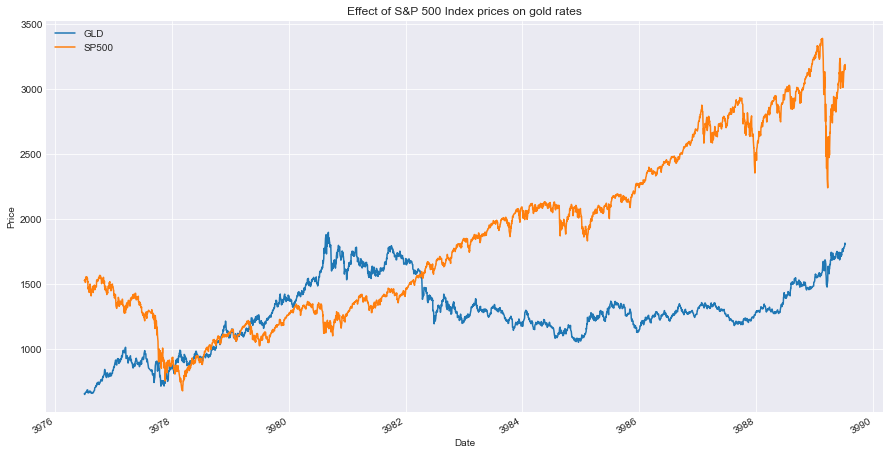

In [22]:
GLD_price = final['Gold_Price']
SPY_adj_close = final['SP_Adj_Close']


df_p = pd.DataFrame({'GLD':GLD_price, 'SP500':SPY_adj_close})

df_ax = df_p.plot(title='Effect of S&P 500 Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

In [23]:
final.columns

Index(['Gold_Price', 'EU_Open', 'EU_High', 'EU_Low', 'EU_Close',
       'EU_Adj_Close', 'G_ETF_Open', 'G_ETF_High', 'G_ETF_Low', 'G_ETF_Close',
       'G_ETF_Adj_Close', 'PLD', 'PLT', 'SP_Open', 'SP_High', 'SP_Low',
       'SP_Close', 'SP_Adj_Close', 'SF_Price', 'USB_Price', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj_Close', 'year'],
      dtype='object')

C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor re

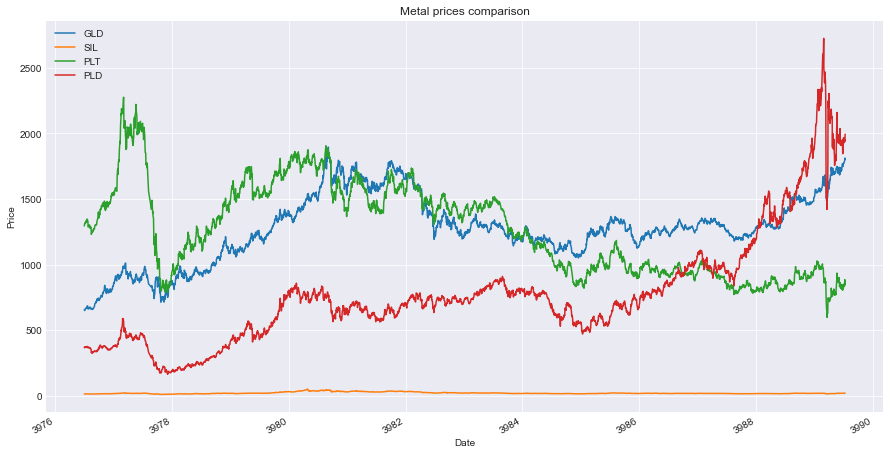

In [24]:
GLD_price = final['Gold_Price']
silver_price = final['SF_Price']
platinum_price = final['PLT']
palladium_price = final['PLD']



df_metal = pd.DataFrame({'GLD':GLD_price, 'SIL': silver_price, 'PLT' : platinum_price, 'PLD' : palladium_price})

df_ax1 = df_metal.plot(title='Metal prices comparison',figsize=(15,8))

df_ax1.set_ylabel('Price')
df_ax1.legend(loc='upper left')
plt.show()

## Computing daily returns of features

In [25]:
#function to compute daily return
def compute_daily_returns(df):
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor re

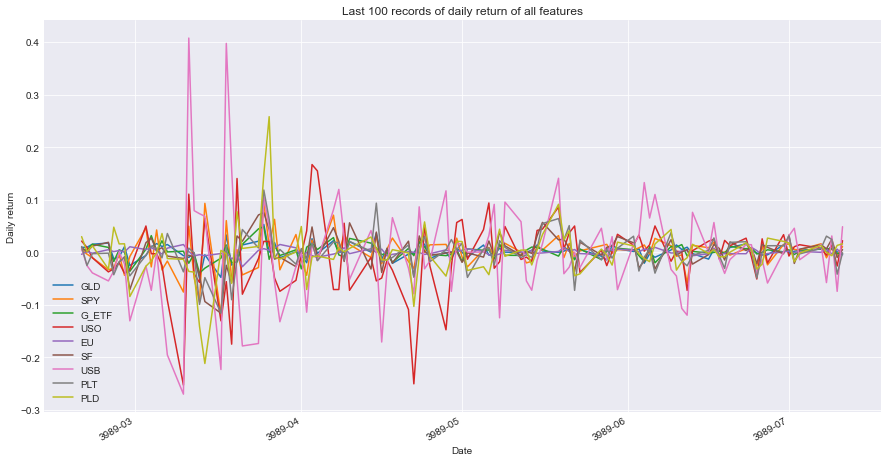

In [26]:
GLD_adj_close = final['Gold_Price']
SPY_adj_close = final['SP_Adj_Close']
G_ETF_adj_close = final['G_ETF_Adj_Close']
USO_Adj_close = final['USO_Adj_Close']
EU_price      = final['EU_Adj_Close']
SF_price      = final['SF_Price']
USB_price      = final['USB_Price']
PLT_price      = final['PLT']
PLD_price      = final['PLD']


GLD_daily_return = compute_daily_returns(GLD_adj_close)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
G_ETF_daily_return = compute_daily_returns(G_ETF_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
EU_return        = compute_daily_returns(EU_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)

df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'G_ETF':G_ETF_daily_return, 'USO':USO_Adj_return,
                  'EU':EU_return, 'SF':SF_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price})

daily_ax = df_d[-100:].plot(title='Last 100 records of daily return of all features',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

## Statistical Measures

Next we compute soe statistical measures of these daily returns, like mean, standard deviation and kurtosis.
While mean and standard deviation are more common, kurtosis measures extreme values in either tail of the distribution. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that is generally less extreme than the tails of the normal distribution.

For investors, high kurtosis of the return distribution implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as kurtosis risk.

Mean= 0.00038108241630744884
Standard Deviation= 0.011472417685107043
Kurtosis= 5.743657825198024


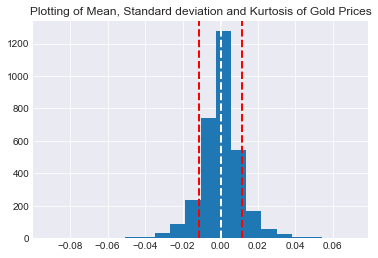

In [27]:
# computing mean,standard deviation and kurtosis of Gold price daily return

mean=df_d['GLD'].mean()
# computing standard deviation of Gold stock
std=df_d['GLD'].std()
kurt=df_d['GLD'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['GLD'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

## Correlation matrix for the original dataframe

<AxesSubplot:>

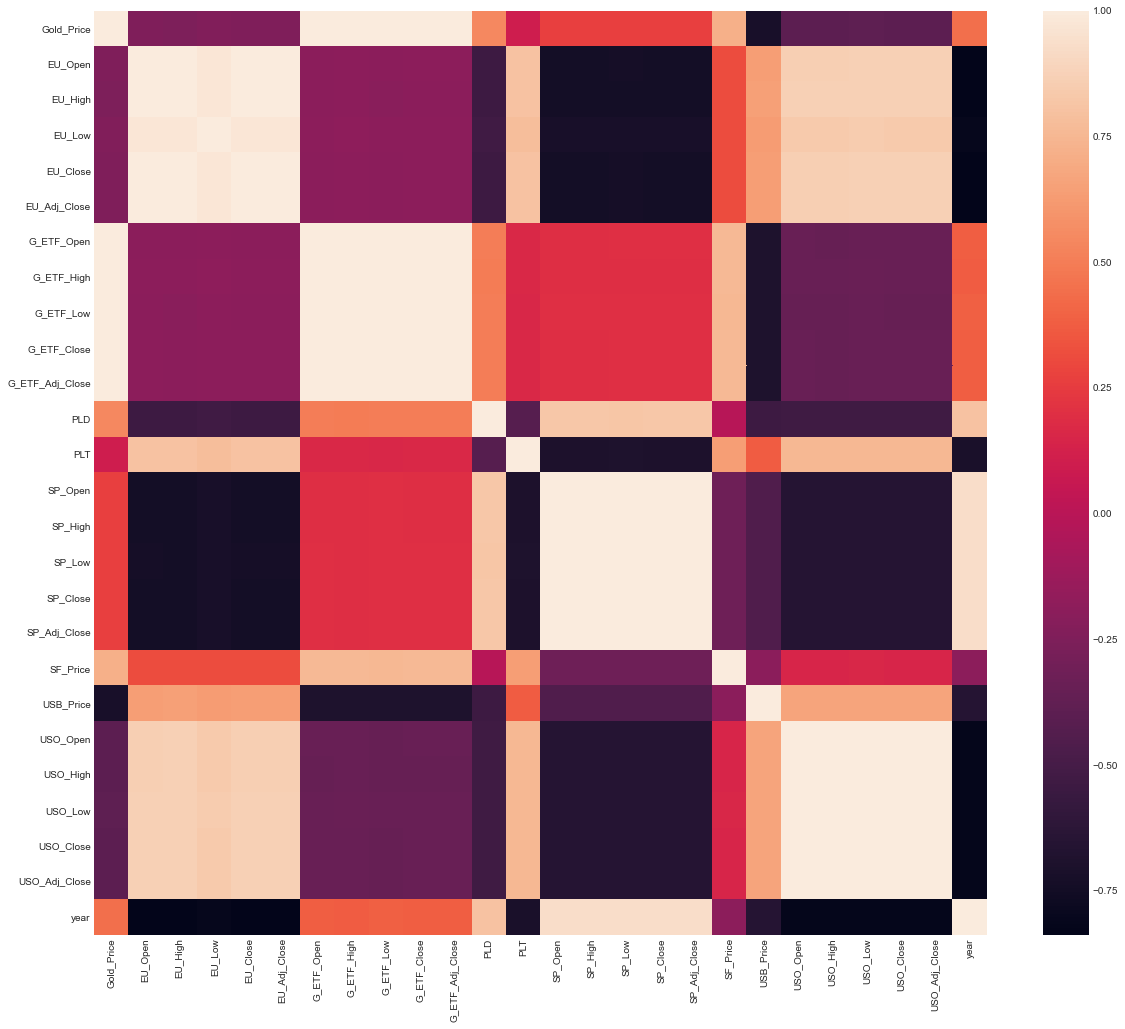

In [28]:
plt.figure(figsize=(20,17)) 
sns.heatmap(final.corr())

That is a lot of correlations between various factors. Let us instead try to find the correlation of just the Gold_price column with the rest of the features

<AxesSubplot:title={'center':'Correlation with Gold Price'}>

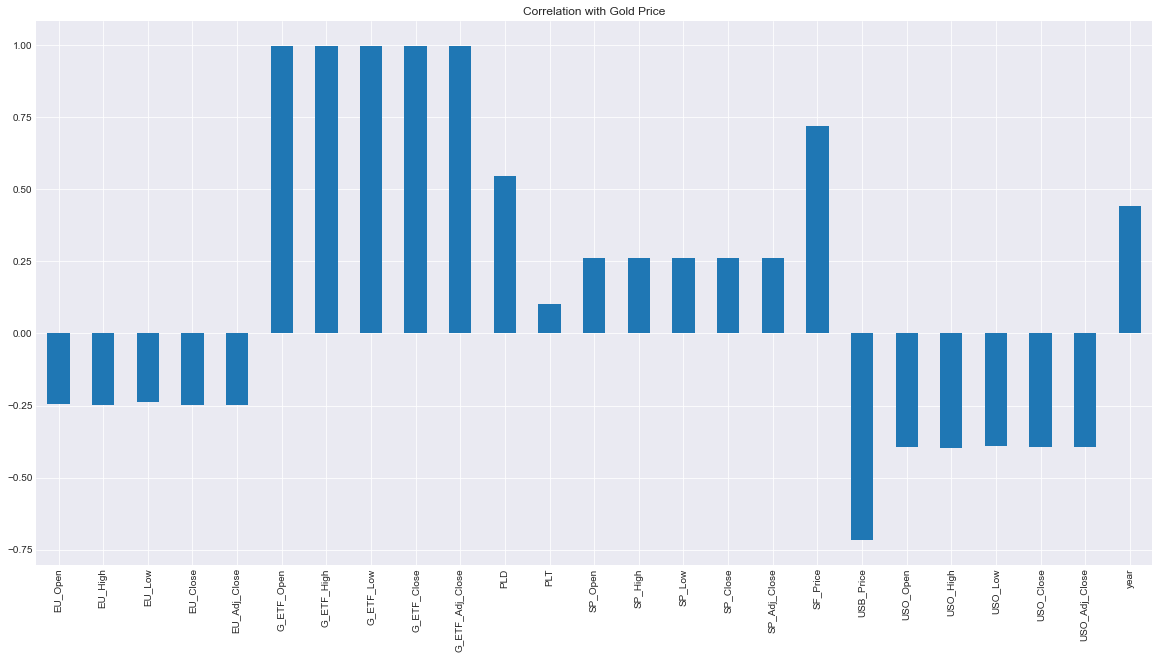

In [29]:
X = final.drop(['Gold_Price'],axis=1)

X.corrwith(final['Gold_Price']).plot.bar(
        figsize = (20, 10), title = "Correlation with Gold Price", fontsize = 10,
        rot = 90, grid = True)

## Technical Indicators


Quantitative research on stock prediction often uses an assortment of calculated technical indicators. Gold prices
should follow many of the principles of predicting financial markets in general. Below I summarizethe indicators I have chosen to use and how I calculate them:

1. MACD : The moving average convergence-divergence (MACD) is one of the most powerful and well-known indicators in technical analysis. The indicator is comprised of two exponential moving averages that help measure momentum in a security. The MACD is simply the difference between these two moving averages plotted against a centerline, where the centerline is the point at which the two moving averages are equal.

2. RSI : The relative strength index (RSI) is another well known momentum indicators that’s widely used in technical analysis. The indicator is commonly used to identify overbought and oversold conditions in a security with a range between 0 (oversold) and 100 (overbought).

3. Simple Moving Average (SMA) : simply takes the sum of all of the past closing prices over a time period and divides the result by the total number of prices used in the calculation. For example, a 10-day simple moving average takes the last ten closing prices and divides them by ten.

4. Upper Band

5. Lower Band

6. DIFF

In [30]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

### Technical Indicators plot

C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
C:\Users\arpit\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor re

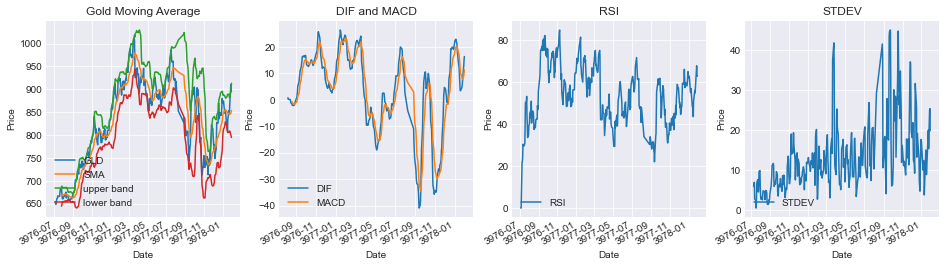

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='Gold Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])


axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

### Final Dataset with all features

In [32]:
test = final
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV

# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target = pd.DataFrame(test['Gold_Price'])


display(test.head())

,Gold_Price,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close,G_ETF_Open,G_ETF_High,G_ETF_Low,G_ETF_Close,...,USO_Close,USO_Adj_Close,year,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-20,659.5,1.348709,1.350804,1.346493,1.347491,1.347491,65.059998,65.400002,64.779999,65.120003,...,428.320007,428.320007,2007,666.533333,675.824702,657.241965,-1.483764,-0.502263,39.695177,4.760252
2007-08-21,657.5,1.347400,1.352009,1.345696,1.345497,1.345497,65.180000,65.300003,64.730003,65.070000,...,419.440002,419.440002,2007,666.000000,676.398077,655.601923,-1.922211,-0.820414,38.206985,4.122135
2007-08-22,659.5,1.345605,1.355803,1.345406,1.354995,1.354995,65.220001,65.529999,65.169998,65.400002,...,418.799988,418.799988,2007,665.580000,676.508129,654.651871,-2.092641,-1.098770,40.593259,1.971801
2007-08-23,660.8,1.354903,1.358806,1.354005,1.355693,1.355693,65.639999,65.800003,65.129997,65.309998,...,421.200012,421.200012,2007,665.213333,676.403857,654.022810,-2.103716,-1.314590,42.149108,1.434573
2007-08-24,660.9,1.355803,1.368701,1.355601,1.366699,1.366699,65.419998,66.209999,65.309998,66.110001,...,429.119995,429.119995,2007,664.573333,675.564360,653.582307,-2.080616,-1.476708,42.273710,1.374045


In [33]:
test.columns

Index(['Gold_Price', 'EU_Open', 'EU_High', 'EU_Low', 'EU_Close',
       'EU_Adj_Close', 'G_ETF_Open', 'G_ETF_High', 'G_ETF_Low', 'G_ETF_Close',
       'G_ETF_Adj_Close', 'PLD', 'PLT', 'SP_Open', 'SP_High', 'SP_Low',
       'SP_Close', 'SP_Adj_Close', 'SF_Price', 'USB_Price', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj_Close', 'year', 'SMA',
       'Upper_band', 'Lower_band', 'DIF', 'MACD', 'RSI', 'STDEV'],
      dtype='object')

In [34]:
feature_columns = ['EU_Open', 'EU_High', 'EU_Low', 'EU_Close',
       'EU_Adj_Close', 'G_ETF_Open', 'G_ETF_High', 'G_ETF_Low', 'G_ETF_Close',
       'G_ETF_Adj_Close', 'PLD', 'PLT', 'SP_Open', 'SP_High', 'SP_Low',
       'SP_Close', 'SP_Adj_Close', 'SF_Price', 'USB_Price', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj_Close', 'year', 'SMA',
       'Upper_band', 'Lower_band', 'DIF', 'MACD', 'RSI', 'STDEV']

### Normalizing using MinMax Scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close,G_ETF_Open,G_ETF_High,G_ETF_Low,G_ETF_Close,G_ETF_Adj_Close,...,USO_Close,USO_Adj_Close,year,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-20,0.553545,0.550635,0.840932,0.551038,0.551038,0.000000,0.000830,0.000426,0.000418,0.000418,...,0.446035,0.446035,0.0,0.003044,0.003857,0.014734,0.417512,0.421278,0.355245,0.040925
2007-08-21,0.551203,0.552783,0.840405,0.547476,0.547476,0.001004,0.000000,0.000000,0.000000,0.000000,...,0.436405,0.436405,0.0,0.002586,0.004310,0.013273,0.413934,0.418140,0.334226,0.034138
2007-08-22,0.547990,0.559548,0.840214,0.564444,0.564444,0.001339,0.001908,0.003749,0.002761,0.002761,...,0.435711,0.435711,0.0,0.002226,0.004397,0.012426,0.412544,0.415394,0.367930,0.011265
2007-08-23,0.564630,0.564903,0.845892,0.565691,0.565691,0.004853,0.004148,0.003408,0.002008,0.002008,...,0.438313,0.438313,0.0,0.001911,0.004315,0.011865,0.412453,0.413265,0.389905,0.005551
2007-08-24,0.566240,0.582547,0.846946,0.585353,0.585353,0.003012,0.007549,0.004942,0.008701,0.008701,...,0.446903,0.446903,0.0,0.001362,0.003652,0.011472,0.412642,0.411666,0.391665,0.004907


In [36]:
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target.shape)

Shape of features :  (3184, 32)
Shape of target :  (3184, 1)


In [43]:
display(feature_minmax_transform.head())

# Shift target array because we want to predict the n + 4 day value
target = target.shift(-4)
validation_y = target[-90:-1]
target = target[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target.shape)
display(target.tail())

,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close,G_ETF_Open,G_ETF_High,G_ETF_Low,G_ETF_Close,G_ETF_Adj_Close,...,USO_Close,USO_Adj_Close,year,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
Date,,,,,,,,,,,,,,,,,,,,,
2007-08-20,0.553545,0.550635,0.840932,0.551038,0.551038,0.000000,0.000830,0.000426,0.000418,0.000418,...,0.446035,0.446035,0.0,0.003044,0.003857,0.014734,0.417512,0.421278,0.355245,0.040925
2007-08-21,0.551203,0.552783,0.840405,0.547476,0.547476,0.001004,0.000000,0.000000,0.000000,0.000000,...,0.436405,0.436405,0.0,0.002586,0.004310,0.013273,0.413934,0.418140,0.334226,0.034138
2007-08-22,0.547990,0.559548,0.840214,0.564444,0.564444,0.001339,0.001908,0.003749,0.002761,0.002761,...,0.435711,0.435711,0.0,0.002226,0.004397,0.012426,0.412544,0.415394,0.367930,0.011265
2007-08-23,0.564630,0.564903,0.845892,0.565691,0.565691,0.004853,0.004148,0.003408,0.002008,0.002008,...,0.438313,0.438313,0.0,0.001911,0.004315,0.011865,0.412453,0.413265,0.389905,0.005551
2007-08-24,0.566240,0.582547,0.846946,0.585353,0.585353,0.003012,0.007549,0.004942,0.008701,0.008701,...,0.446903,0.446903,0.0,0.001362,0.003652,0.011472,0.412642,0.411666,0.391665,0.004907


,EU_Open,EU_High,EU_Low,EU_Close,EU_Adj_Close,G_ETF_Open,G_ETF_High,G_ETF_Low,G_ETF_Close,G_ETF_Adj_Close,...,USO_Close,USO_Adj_Close,year,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-25,0.081447,0.082348,0.667068,0.081953,0.081953,0.753514,0.753049,0.751299,0.738203,0.738203,...,0.071751,0.071751,1.0,0.797894,0.786630,0.782652,0.636795,0.601186,0.806596,0.272616
2020-02-26,0.087165,0.086240,0.668644,0.087812,0.087812,0.742637,0.746412,0.751214,0.743809,0.743809,...,0.069929,0.069929,1.0,0.802271,0.790993,0.786821,0.636139,0.616125,0.715545,0.197306
2020-02-27,0.087999,0.104449,0.670627,0.088507,0.088507,0.757363,0.754625,0.759734,0.744060,0.744060,...,0.066372,0.066372,1.0,0.807919,0.796668,0.792149,0.644402,0.630075,0.763064,0.135639
2020-02-28,0.107663,0.112844,0.674979,0.108398,0.108398,0.733350,0.725591,0.701372,0.697038,0.697038,...,0.063509,0.063509,1.0,0.810585,0.796347,0.798050,0.621025,0.635582,0.566249,0.234951
2020-03-02,0.117862,0.132689,0.680638,0.118060,0.118060,0.710676,0.708669,0.718327,0.703899,0.703899,...,0.067586,0.067586,1.0,0.812130,0.795844,0.801825,0.593889,0.633427,0.527581,0.242008


,Gold_Price
Date,
2020-02-25,1683.7
2020-02-26,1672.5
2020-02-27,NaN
2020-02-28,NaN
2020-03-02,NaN



 -----After process------ 

Shape of features :  (3004, 32)
Shape of target :  (3004, 1)


,Gold_Price
Date,
2019-10-15,1513.5
2019-10-16,1492.4
2019-10-17,1486.8
2019-10-18,1492.1
2019-10-21,1511.0


In [49]:
validation_y.dropna(inplace = True)

In [51]:
validation_X.drop(validation_X.tail(3).index,inplace=True)

### Time Series Split from sklearn

In [52]:
from sklearn.model_selection import TimeSeriesSplit

ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target[:len(train_index)].values.ravel(), target[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2731, 32), (273, 32), (2731,), (273,))

In [54]:
#function to validate results

def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper left')
    plt.show()

## Model Building

#### Model 1 Decision Tree Regressor

RMSE:  161.61575123270512
R2 score:  -5.408621342820098


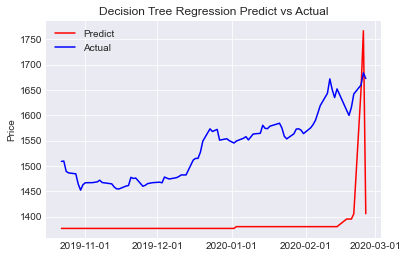

Wall time: 219 ms


In [55]:
%%time
#Train a decision tree regressor with default parameters
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

#### Model 2 : Support Vector Regressor

RMSE:  57.25784871167832
R2 score:  0.1956088298797144


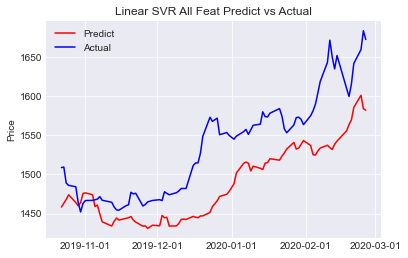

Wall time: 441 ms


In [56]:
%%time
# Saving the solution models that will give better results
solution_models = {}
# SVR with  linear Kernel
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')

Nice, much better R^2 and definitely lesser RMSE score. This is looking good. Now let us use grid search CV to tune the hyperparameters of the SVR model and see if it performs better.

RMSE:  56.26436708088309
R2 score:  0.2232806637770166


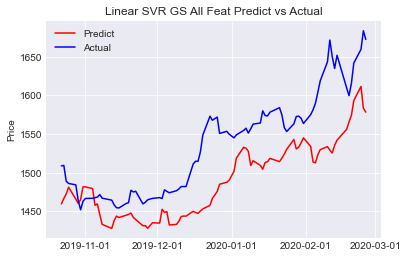

Wall time: 18.7 s


In [57]:
%%time
from sklearn.model_selection import GridSearchCV

linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')

In [58]:
#Let us save this model since it performs very well.
solution_models['SVR All Feat'] = lsvr_grid_search_feat

#### Model 3 and 4 : Lasso and Ridge Regression

RMSE:  55.72369655755785
R2 score:  0.23813665621602442


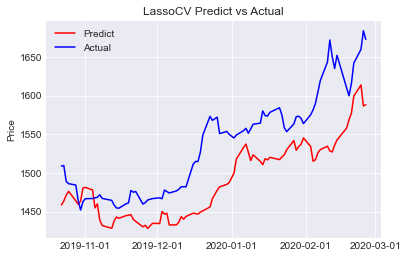

RMSE:  65.9767318469277
R2 score:  -0.06801865668289708


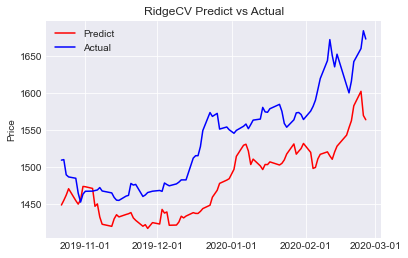

In [59]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

#### Model 5 : Bayesian Ridge

RMSE:  66.01518505316038
R2 score:  -0.06926396570501003


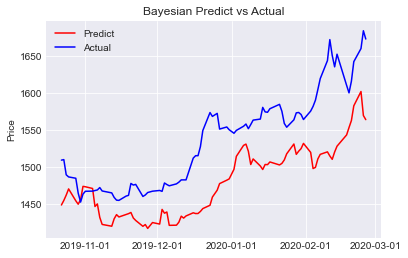

In [60]:
from sklearn import linear_model

bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

#### Model 6 : Random Forest Regressor (default parameters, no hyperparameter tuning)

RMSE:  131.01534089173174
R2 score:  -3.2115459519581755


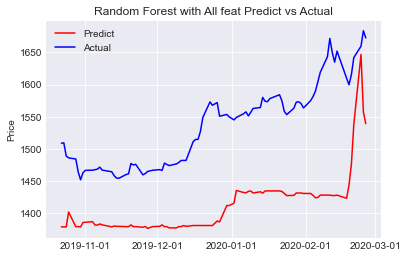

Wall time: 2.07 s


In [61]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

It seems tree based methods do not perform well when it comes to this analysis. 

#### Model 7 : Gradient Boosting Regressor

RMSE:  161.51653893237977
R2 score:  -5.400755538844192


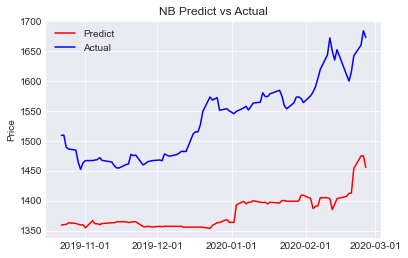

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')
solution_models['GB All Feat'] = GB_feat

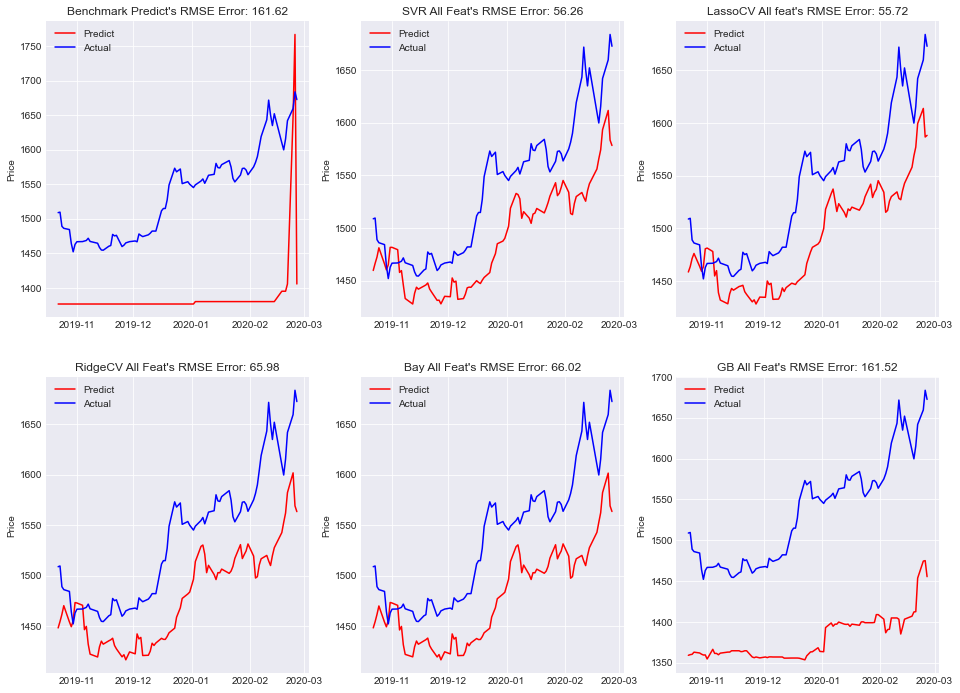

In [63]:
#Let us take a look at all the models here


RMSE_scores = {}
R2_score = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    benchmark_r2_score = r2_score(validation_y, benchmark_predicted)
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    R2_score['Benchmark'] = benchmark_r2_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper left')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
        model_R2_score = r2_score(validation_y,predicted)

           
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper left')
        RMSE_scores[name] = RSME_score
        R2_score[name] = model_R2_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)

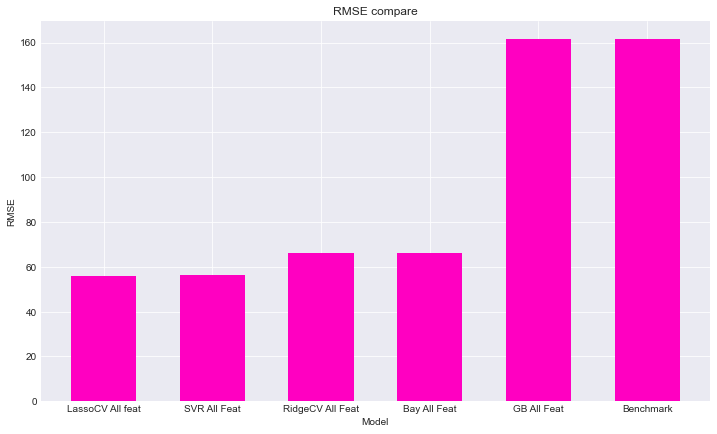

In [65]:
model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:6]]
values = model_values[indices][:6]

fig = plt.figure(figsize = (12,7))
plt.bar(np.arange(6), values ,width = 0.6, align="center", color = '#ff00c1')
plt.xticks(np.arange(6), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()

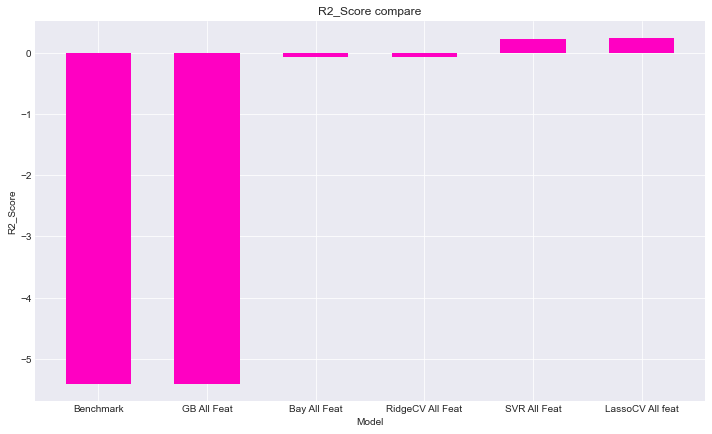

In [66]:
model_names = []
model_values = []
for name, value in R2_score.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:6]]
values = model_values[indices][:6]

fig = plt.figure(figsize = (12,7))
plt.bar(np.arange(6), values ,width = 0.6, align="center", color = '#ff00c2')
plt.xticks(np.arange(6), columns)
plt.xlabel('Model')
plt.ylabel('R2_Score')
plt.title('R2_Score compare')   
plt.show()

It seems of all of these models, Lasso CV has the least RMSE of 55.72, but a poor R^2 value of .23.

Let us use this model to make predictions for the gold price on 24th July 2020. For this, we would need to know the values of each of the features used on 20th July 2020.

We do not do this here, because there are some caveats we need to keep in mind. This list of features I used in building these regression models is in no way exhaustive. There could definitely be more features that could be taken into cconsideration.

This initial approach is good, however, let us instead try a different approach to solving this question.

In the second notebook, we study the gold prices as a time series and make predictions via time series analysis. This would be my first venture into the world of time series forecasting.